# 加载库与数据

In [88]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
 



In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

我主要是用Pandas来做数据的读取和清洗的，比如处理缺失值和不一致的数据。
然后我用Seaborn画了一些统计图表，做了探索性分析，比如看了各个特征和最终结果之间的相关性。
最后，我用了Sklearn这个库提供的一些机器学习模型，比如随机森林，来做训练和预测，并用它提供的评估工具看了下模型的准确率。
通过这个过程，我对整个数据分析的流程有了一个比较完整的了解。

# 了解数据 

In [90]:
#loading data
df = pd.read_csv('C:/Users/bai/Desktop/kaggle-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [91]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

读取数据，分析每个特征字段，按照业务理解分类，方便分析
- 上个月离职的客户--该列称为 "流失"，即Churn(最后一列,YES则代表客户流失)
- 客户注册的服务--phone电话、multiple line多线路、internet互联网、online security在线安全、 online backup在线备份、device protection设备保护、tech support技术支持以及streaming TV and movies流媒体电视和电影
- 客户账户信息--成为客户的时间tenure、合同、付款方式、无纸账单、月费和总费用
- 客户人口统计信息--性别、年龄范围、是否有伴侣和家属

In [92]:
df.shape #看行列数，即看维度

(7043, 21)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


info()输出了整个数据集的信息,我们要做初步检查：
1. 7043行，21列数，从0开始计数
2. 非空计数，7043行无缺失值，数值质量好。
3. 数据类型：int是整数，object是文本字符串，float是浮点数(小数),dtypes总结了21列的数据类型。大部分特征是分类特征(18)，只有3个是数值特征。其中TotalCharges 是object文本，但应该是数字才对，可能有些值存在空格，特殊符号，导致pandas**无法识别为数字**，后续需要清洗TotalCharges列
4. 找到目标变量Churn，预测客户是否流失，即Churn = 'YES' or 'NO'

In [94]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [95]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# 缺失值可视化(矩阵)

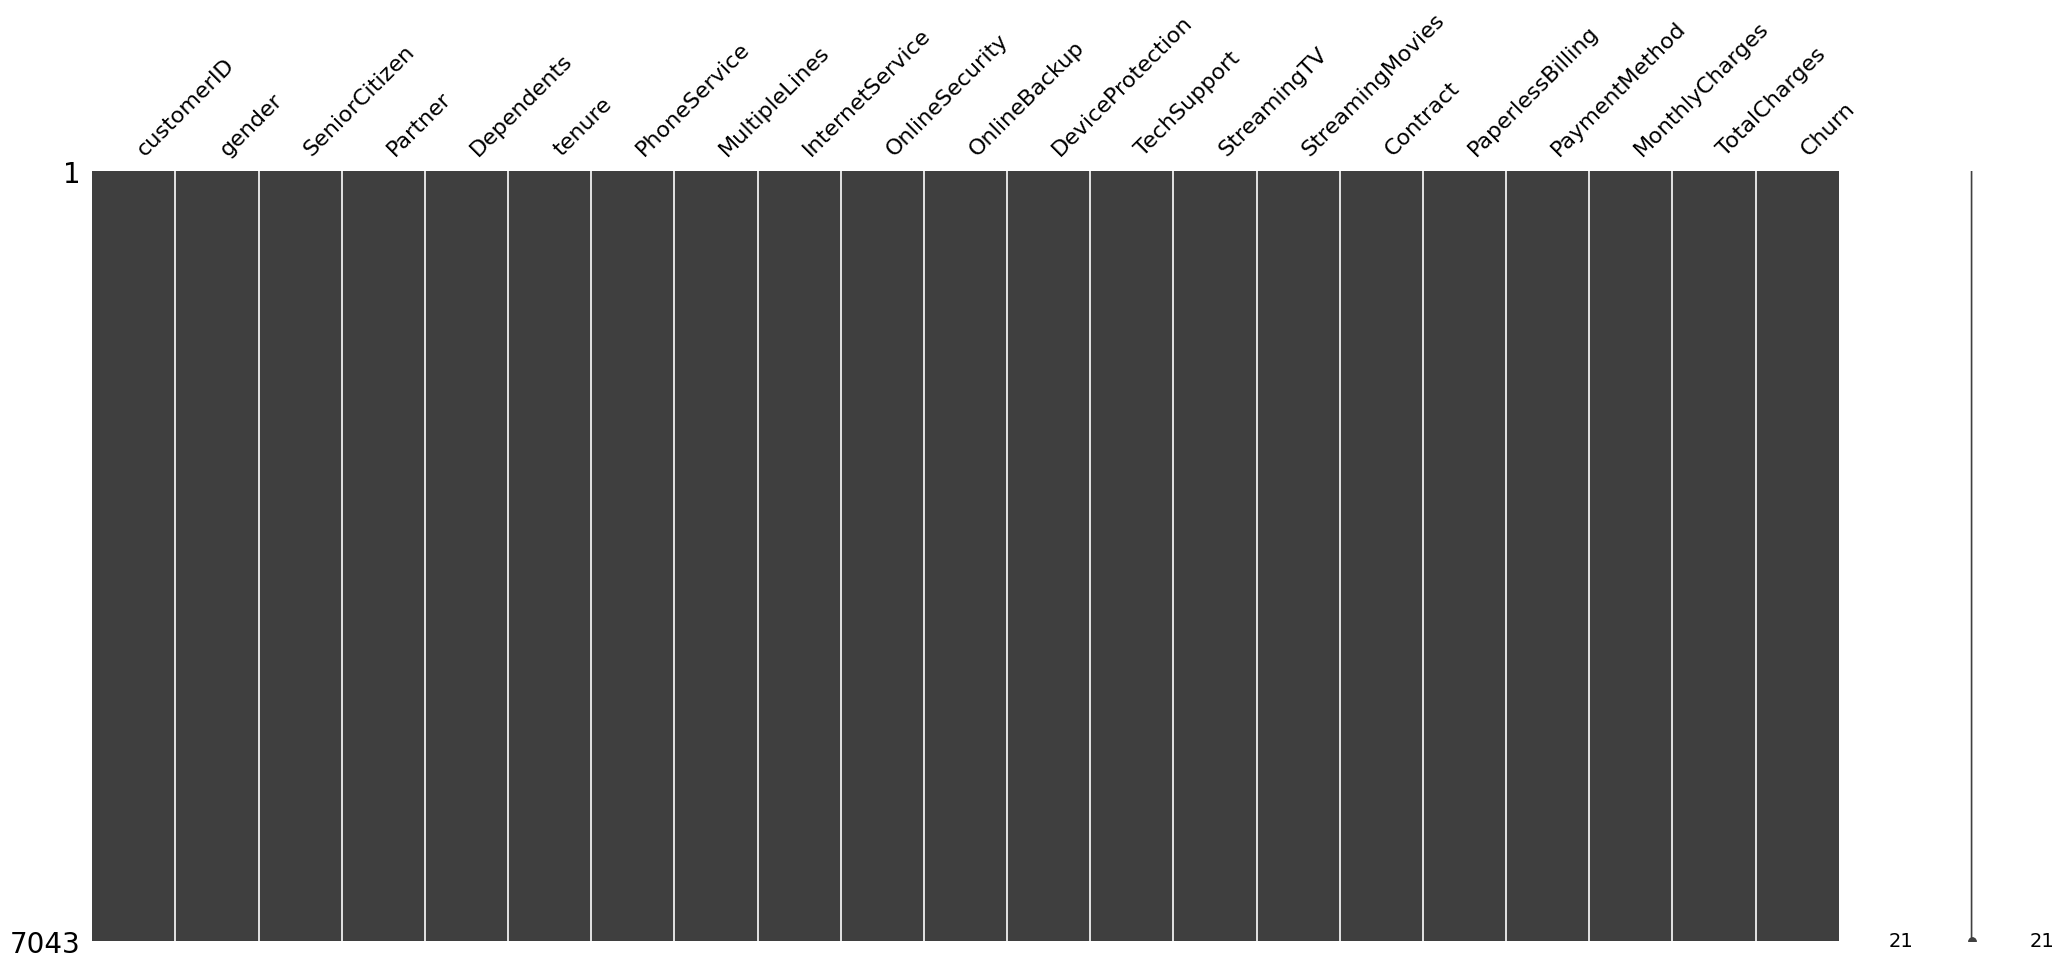

In [96]:
msno.matrix(df); 

发现图形全黑没有遗漏，7043行中不存在缺失值(上面的info()函数中就已经得知)

# 数据清洗

In [97]:
df = df.drop(['customerID'], axis = 1) 
#删除顾客id列, 当axis=0即删除行。df.drop([0, 1, 2], axis=0) → 删除索引为0, 1, 2的行。
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

customerid列没有信息价值。并且防止过拟合(防止模型看到某些样本id就预测为流失)
因此，机器学习中删除唯一标识符(ID,姓名，订单号等)是数据预处理的步骤之一

In [98]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors = 'coerce')
#pandas的万能转换函数: pd.to_numeric(...,errors = 'coerce')强制转换为数值类型，errors='coerce'将无法转换的值显式标记为缺失值NAN
# df.TotalCharges 即df['TotalCharges']
df.isnull().sum()
#isnull生成和原数据框df一样大小的T/F矩阵,某位置是缺失值即T, .SUM()是对上一步结果按列就和

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

可以看到TotalCharges有11个缺失值

In [99]:
df[np.isnan(df['TotalCharges'])]
#np.isnan()：这是 NumPy 库的函数。判断一个值是否是 NaN，如果是返回 T，否则F
#np.isnan(df['TotalCharges'])根据这列的值生成了一个T/F序列,最后锁定缺失值所在行

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)           52.55           NaN    No  
753                Mailed check           20.25           NaN    No  
936                Mailed check           80.85           NaN    No  
1082               Mailed check           25.75           NaN    No  
1340    Credit card (automatic)           56.05           NaN    No  
3331               Mailed check           19.85           NaN    No  
3826               Mailed check           25.35           NaN    No  
4380               Mailed check           20.00           

In [100]:
df[df['tenure']==0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

tenure缺失值只有11行，即11个样本，相比7043样本数而言，这个数据量很小，直接删除这些异常值样本也不会影响数据分析

In [101]:
df.drop(labels = df[df['tenure']==0].index,axis=0,inplace=True)
#一般可以不写labels,只是有index等比较多的参数为了可读性加labels
#inplace = True这里的用法就是使得df = df.drop(...)前面这个df=可以去掉,df自动变drop后的数据框
df[df['tenure']==0].index

Index([], dtype='int64')

现在处理完tenure=0的问题，回到totalcharges缺失值问题，决定不和tenure一样去删减，而是选择使用totalcharges平均值去填充这些值


In [102]:
df['TotalCharges'].fillna(df['TotalCharges'].mean())
#此处应该是df = df['TotalCharges'].fillna(df['TotalCharges'].mean()),但是
#totalcharges缺失值行和tenure缺失值行对应,故缺失值行早就被删除了,此处只是一个不同的缺失值处理方法展示

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [103]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [104]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female            No     Yes         No       1           No   
1    Male            No      No         No      34          Yes   
2    Male            No      No         No       2          Yes   
3    Male            No      No         No      45           No   
4  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

是否是年老公民，原先显示为0，1，但是不够直观，为了增加数据可读性，将0/1转换为Yes/No

In [105]:
df["InternetService"].describe(include=['object', 'bool'])
# describe默认只对数值型数据处理所以这里include 文本列、布尔列(布尔列就是T/F列)

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [106]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000

上述describe即读取数据的整体情况，看看处理完的数据情况如何，发现7032个客户，在3种互联网服务中使用最多的是Fiber optic光纤，共3096人使用。而数值型数据，tenure在网时长，monthlycharges月费，totalcharges总费用则分别统计出了平均值，标准差，最大值，分位数等信息

# 数据可视化

In [107]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# 定义两个标签,性别列表,流失列表(用于后续的gender列,churn列数据分布标签)
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
#make_subplots函数建立一个子图布局,这里是1行2列的子图(即并排两个图表) 子图类型是domain,即饼图
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

#使用add_trace方法向子图中添加一个饼图（go.Pie对象）。
#values=df['gender'].value_counts()：计算df数据框中gender列各个值的出现次数，将这些次数作为饼图中各部分的大小
#1,1代表将饼图添加到1行1列的子图位置
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)
# 通过update_traces方法更新所有的图表轨迹（在这里就是两个饼图）。
# hole=.4：设置饼图中间的空洞大小为 0.4，从而将饼图变成甜甜圈的形状。
# hoverinfo="label+percent+name"：当鼠标悬停在饼图上时，显示标签、百分比和图表名称。
# textfont_size=16：设置饼图上文字的字体大小为 16。
fig.update_layout(
    title_text="Gender and Churn Distributions",
    annotations=[dict(text='Gender', x=0.15, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
# 设置整个图表的标题为"Gender and Churn Distributions"（性别和客户流失分布）。
# annotations：添加注释。这里分别在两个甜甜圈饼图的中心位置添加注释文字，text是注释内容，x和y是注释的坐标位置（在 0 到 1 的范围内，相对于图表的大小），font_size是注释文字的字体大小，showarrow=False表示不显示指向注释位置的箭头
fig.show()

左边的饼图呈现了数据集中gender（性别）列的分布情况，通过不同的扇形比例展示男性和女性的占比；右边的饼图则呈现了Churn（客户是否流失）列的分布情况，展示客户流失与未流失的比例。让分析人员直观地了解性别和客户流失这两个重要因素在数据集中的分布状态。
其中26.6%顾客流失去了其他服务商，顾客性别里男女基本持平，男性50.5%,女性49.5%

In [108]:
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [109]:
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

上述代码分析了流失与未流失客户里男女的分布情况

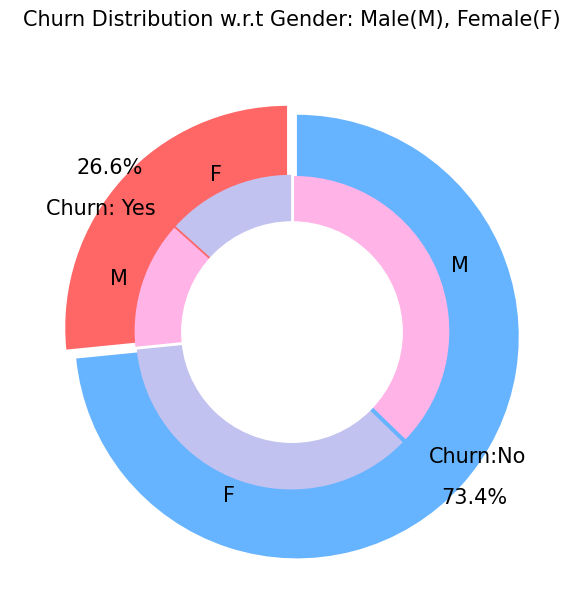

In [110]:
plt.figure(figsize=(6, 6))
# 创建新的图形窗口宽6,高6英寸
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
# 上面的是外层饼图, 下面的是内层饼图
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
# explode 控制饼图部分的分离程度
textprops = {"fontsize":15}
#Plot,下面是内外层饼图的绘制
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#绘制中心的白色圆圈
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

 
plt.axis('equal')
# equal保证饼图是圆形
plt.tight_layout()
# 自动调整子图参数,避免元素重叠
plt.show()

通过饼图合一，更直观的体现客户流失与否的数据里,两性的表现相似

In [111]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

前面分析了churn与性别gender关系不大，现在转而分析那churn与其他参数的关系如何？比如合同期限里，不同期限的用户流失数据展示成直方图。
可以看出，月签客户流失的最多，相当于月签客户里未流失客户的75%,相比之下,13% 的一年签约客户和 3% 的两年签约客户选择退出。

In [112]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

现在继续研究churn与支付方式payment method的关系,看看哪种payment method分布情况，流失数据里情况又如何?

In [113]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* 迁出的主要客户使用电子支票作为付款方式。
* 选择信用卡自动转账或银行自动转账和邮寄支票作为付款方式的客户迁出的可能性较小。

In [114]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [115]:
df[df["gender"]=="Male"][["InternetService", "Churn"]].value_counts()
# value_counts代表每个独特值的计数,这里就是男性里, internetservice,churn两列组合值的计数

InternetService  Churn
DSL              No       992
Fiber optic      No       910
No               No       717
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
Name: count, dtype: int64

In [116]:
df[df["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       965
Fiber optic      No       889
No               No       690
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
Name: count, dtype: int64

In [117]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")
# <b>是粗体显示
fig.show()

* 很多客户选择光纤服务，但使用光纤服务的客户流失率也很高，这可能表明他们对这种互联网服务不满意。
* 与光纤服务相比，使用 DSL 服务的用户占大多数，流失率也较低。

In [118]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

从表可以得出结论,没有家属的客户更容易流失

In [119]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

没有伴侣的客户更容易流失

In [120]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

可以看出，老年人比例非常低。老年公民流失比例往往更高

In [121]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

缺乏网络安全的客户流失率最高

In [122]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="PaperlessBilling",  title="<b>Chrun distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

使用无纸化计费的客户最有可能流失

In [123]:
fig = px.histogram(df, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

没有技术支持的客户流失率最高

In [124]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="PhoneService", title="<b>Chrun distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

只有极少数客户没有电话服务,无论有无电话服务,相比于留存顾客,大约 1/3 的客户流失。

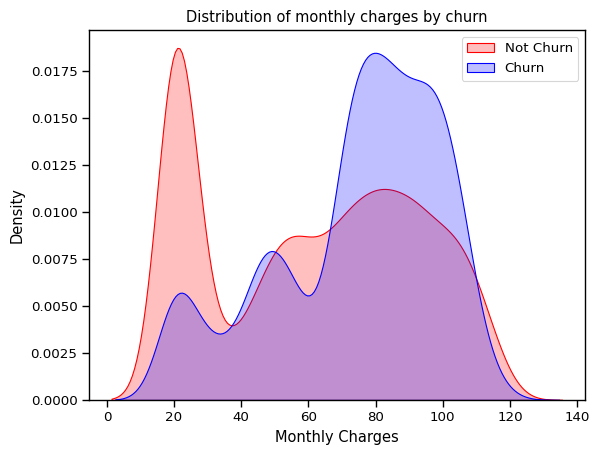

In [125]:
sns.set_context("paper",font_scale=1.1)
#选择 "paper" 上下文，意味着图形的风格适合在学术论文等正式文档中使用，例如线条粗细、字体大小等会采用相对适中的设置。
# font_scale=1.1 参数将所有文本元素（如坐标轴标签、图例文字、标题等）的字体大小在 "paper" 的基础上放大 1.1 倍。
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
# ax = ax 参数表示将新绘制的核密度图添加到之前创建的 ax 坐标轴上，从而实现两种不同客户流失状态下核密度图的叠加显示，方便对比。
ax.legend(["Not Churn","Churn"],loc='upper right');
# ax.legend() 函数用于添加图例，帮助读者识别不同颜色的曲线所代表的含义。
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

月费较高的客户更容易流失

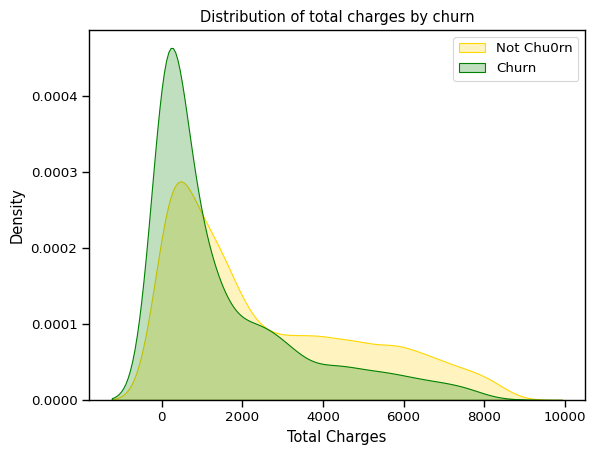

In [126]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

总费用的分析不显著，所以忽略

In [127]:
fig = px.box(df, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

新客户更容易流失

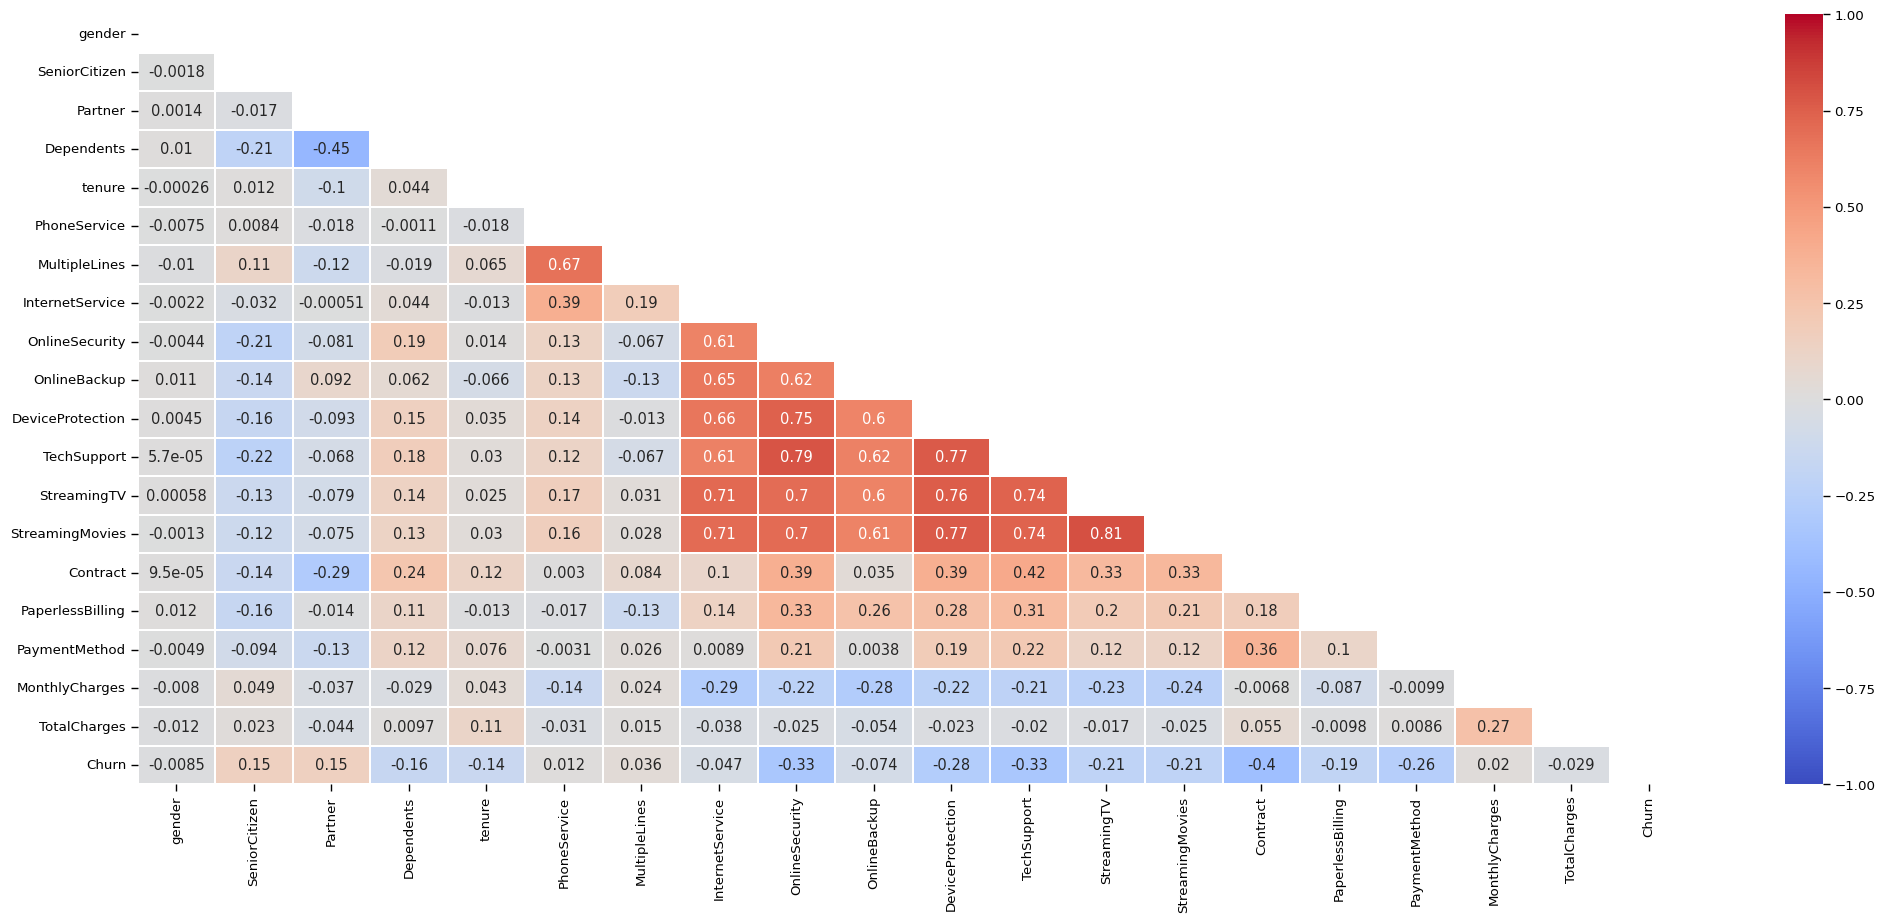

In [128]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
# apply函数将 df 中所有列都转换为数值型，以便后续计算相关性。
# corr相关性矩阵, 计算i列,j列间的相关系数,取值为0表示两者之间不存在线性相关关系。
mask = np.triu(np.ones_like(corr, dtype=bool))
# np.ones_like(corr, dtype=bool)：创建一个与 corr 形状相同的数组，数组中的元素全部为 True，并且数据类型为布尔型。
# np.triu()：获取这个数组的上三角部分（包含对角线）。最终得到的 mask 是一个布尔型的上三角矩阵，其作用是在后续绘制热力图时，将上三角部分（因为相关性矩阵是对称的，上三角和下三角信息重复）屏蔽掉，使热力图只显示下三角部分，避免信息冗余，让图形更加简洁直观。
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

分析完churn流失客户与各个指标间的联系后，现在我们看一下指标的相关性分析。其中性别列gender与其他指标最"无关",StreamingTV和StreamingMovies相关性最强，达到0.81

# 数据预处理

**先将数据分成训练集、测试集**

In [129]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series
# LabelEncoder()：这是 sklearn.preprocessing 模块中的一个类，用于对标签进行编码。它的作用是将分类变量（如字符串形式的类别）转换为整数编码。例如，有一个包含 ['red', 'green', 'blue'] 的序列，经过 LabelEncoder 编码后可能变为 [0, 1, 2]。
# fit_transform()：这是 LabelEncoder 类的一个方法，它结合了 fit 和 transform 两个操作。fit 方法会学习数据中的不同类别，transform 方法则根据学习到的类别将数据进行编码转换。这里将 dataframe_series 作为参数传入 fit_transform 方法，就会把其中的非数值类别数据转换为对应的整数编码，然后将转换后的结果重新赋值给 dataframe_series。

In [130]:
df = df.apply(lambda x: object_to_int(x))
# df.apply(...)：apply 方法是 pandas 中 DataFrame 的一个非常有用的方法，它可以对 DataFrame 的行或列应用一个函数。这里没有指定 axis 参数，默认 axis=0，表示对每一列进行操作。
# lambda x: object_to_int(x)：这是一个匿名函数，它接受一个参数 x（这里的 x 代表 df 中的每一列，也就是一个 Series 对象），然后将这个 Series 作为参数传递给之前定义的 object_to_int 函数进行处理。
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1

In [131]:
plt.figure(figsize=(14,7))
# 设置图形大小
df.corr()['Churn'].sort_values(ascending = False)
# 计算并降序排序相关性

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [132]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)
# test_size = 0.30：这个参数指定了测试集在整个数据集中所占的比例。这里设置为 0.30，意味着将 30% 的数据划分为测试集，剩下的 70% 作为训练集。
# random_state = 40：这是一个随机种子参数。设置固定的随机种子可以确保每次运行代码时，数据集的划分方式都是一致的。也就是说，只要 random_state 的值不变，无论运行多少次代码，得到的训练集和测试集都是相同的。这在模型的调试和比较过程中非常重要，因为它使得实验结果具有可重复性。
# stratify=y：这个参数用于实现分层抽样。它确保在划分训练集和测试集时，目标变量 y 的各类别比例在训练集和测试集中与原始数据集中保持一致。例如，如果在原始数据集中，客户流失（Churn 为 'Yes'）的比例是 20%，未流失（Churn 为 'No'）的比例是 80%，那么使用 stratify=y 后，训练集和测试集中这两个类别的比例也会大致保持 20% 和 80%。
# stratify=y：对于处理类别不平衡的数据非常有用，可以避免训练集或测试集过度偏向某一个类别，从而提高模型在不同类别上的泛化能力。

In [134]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

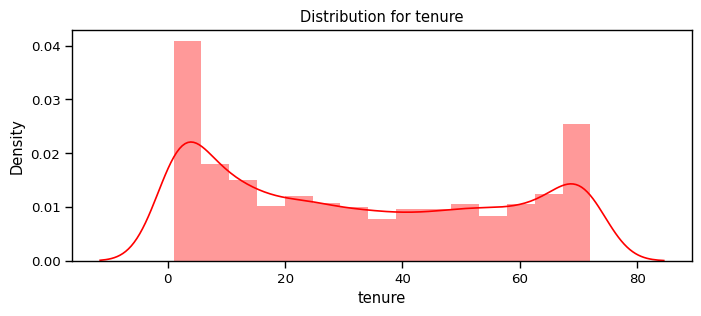

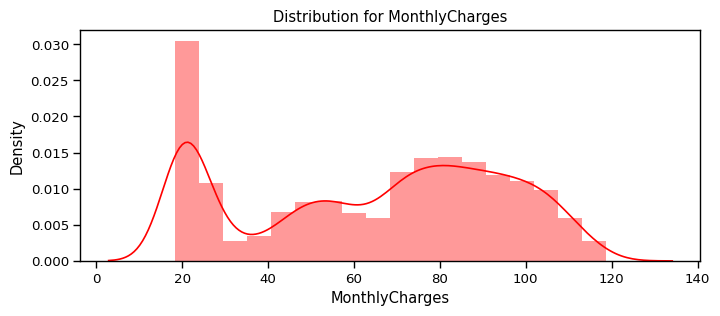

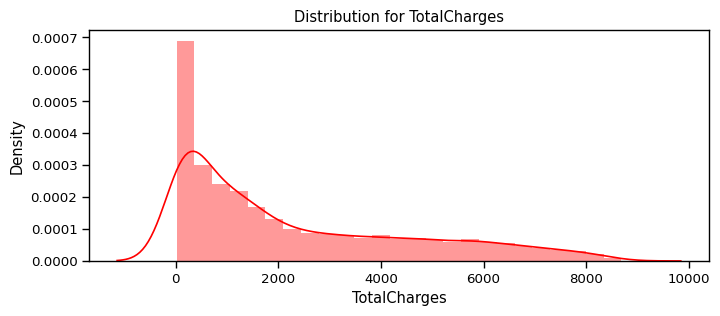

In [135]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)
# 这是一个 for 循环，遍历 num_cols 列表中的每个元素（即每个特征名）。在每次循环中：
# feat 依次取到 "tenure"、'MonthlyCharges' 和 'TotalCharges' ,feat是循环变量也可以取其他变量名称,方便理解

由于数值特征分布在不同的数值范围内，我将使用标准标量将它们缩放到相同的范围内。(即统一量纲，使参数方便对比分析)

<a id = "111" ></a>
#### **数据标准化(归一化)**
<a id = "Standardizing" ></a>

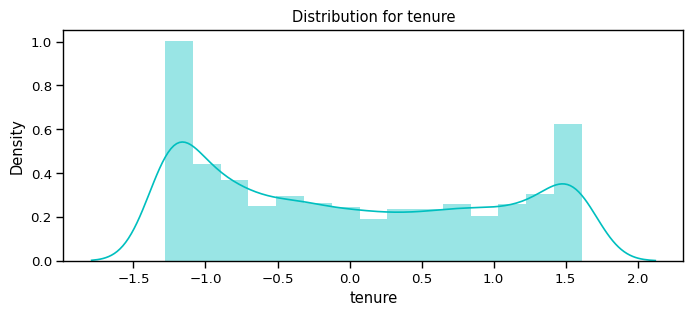

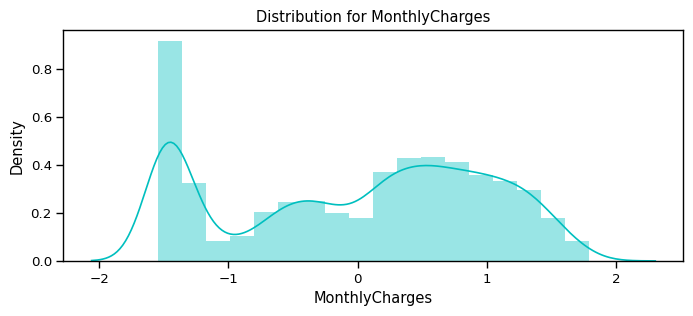

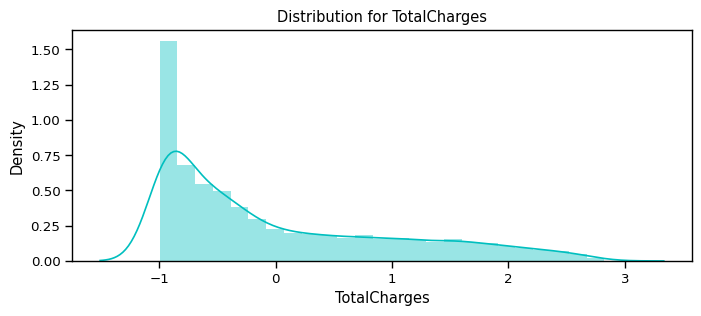

In [136]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in num_cols: distplot(feat, df_std, color='c')
# 减去均值,除标准差,将数据转化为均值为0,标准差为1的标准正态分布

发现归一化效果良好，所以后续将对训练集、测试集进行数据标准化(归一化)

现在,先将数据分为三类:
* num_cols：数值型特征（如之前提到的tenure、MonthlyCharges等），需要标准化处理。
* cat_cols_ohe：类别型特征中 “无顺序关系” 的特征（如PaymentMethod的不同支付方式、InternetService的不同网络类型），适合用独热编码。
* cat_cols_le：类别型特征中 “有顺序关系” 或 “二元类别” 的特征（如Yes/No、Low/Medium/High等），适合用标签编码。

In [137]:
# 需进行独热编码（one-hot encoding）的类别特征
cat_cols_ohe = ['PaymentMethod', 'Contract', 'InternetService']

# 需进行标签编码（label encoding）的类别特征
cat_cols_le = list(set(X_train.columns) - set(num_cols) - set(cat_cols_ohe))

In [138]:
# 对数值型数据,即num_cols数据进行标准化操作(训练、测试集)
scaler = StandardScaler()

# 用训练集数据拟合标准化器，并对训练集数值特征进行标准化
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# 用训练集拟合的标准化器，对测试集数值特征进行标准化（保持一致性）
X_test[num_cols] = scaler.transform(X_test[num_cols])


# 机器学习模型评估和预测

1. **KNN**                                                       
对于一个新的数据点，KNN 算法会在训练数据集中找到与它距离最近的 K 个邻居（这里的距离通常使用欧氏距离、曼哈顿距离等度量方式）。然后，根据这 K 个邻居所属的类别，通过多数表决的方式来确定新数据点的类别。例如，在一个二分类问题中，如果 K = 5，在找到的 5 个邻居中，有 3 个属于类别 A，2 个属于类别 B，那么新数据点就会被分类为类别 A。


In [139]:
# churn已经有明确的标签类别,先采用监督学习算法
knn_model = KNeighborsClassifier(n_neighbors = 11) 
# k一般取5-20,这里我经验选择了一个适中的,还可以遍历k值,从1到50,每个k值进行交叉验证,看准确率,F1值
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7758293838862559


In [140]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1549
           1       0.59      0.52      0.55       561

    accuracy                           0.78      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



精确率（precision）：表示模型预测为某一类别的样本中，实际属于该类别的比例。计算公式为 
precision= 
TP/(TP+FP)
，其中 
TP
 是真阳性（正确预测为该类别的样本数），
FP
 是假阳性（错误预测为该类别的样本数）。

召回率（recall）：表示实际属于某一类别的样本中，被模型正确预测出来的比例。计算公式为 
recall= 
TP/(TP+FN)
，其中 
FN
 是假阴性（实际属于该类别但被错误预测为其他类别的样本数）。
F1 分数（f1 - score）：是精确率和召回率的调和平均值，综合考虑了两者的性能。计算公式为 
F1=2× precision×recall/
(precision+recall) 
。F1 分数越高，说明模型在该类别上的性能越好。

支持度（support）：指的是该类别在测试集中的实际样本数量。

宏观平均（macro avg）：算术平均值。

加权平均（weighted avg）：根据每个类别在测试集中的样本数量（支持度）作为权重，对每个类别的精确率、召回率和 F1 分数进行加权平均。它考虑了类别样本数量不均衡的情况，更能反映模型在整个测试集上的综合性能。

2.  **SVC**

SVC 即 Support Vector Classification，是支持向量机（Support Vector Machine，SVM,监督学习模型）在分类问题上的应用。

在分类任务中，SVM 的基本思想是找到一个最优超平面，将不同类别的数据点尽可能正确地分开，并且使两类数据点到超平面的间隔最大。这个间隔被称为 “边际”，最大化边际可以提高模型的泛化能力，使其在未见过的数据上也能有较好的表现。

当数据在原始特征空间中线性不可分的时候，SVM 可以通过核函数（如多项式核函数、径向基核函数等）将数据映射到更高维的特征空间，使得在新的空间中能够找到一个线性可分的超平面。


In [141]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.8075829383886256


In [142]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.69      0.50      0.58       561

    accuracy                           0.81      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



从调和平均的F1值和准确率上,可以看出SVC比KNN性能要强

3. **Random Forest**

随机森林（Random Forest）- Bagging 类型的集成算法，常用于分类和回归任务。它基于决策树构建，通过组合多个决策树的预测结果来提高整体的预测性能和泛化能力。
其基本原理是：
Bootstrap 抽样：从原始训练数据集中有放回地随机抽取多个子集（每个子集的大小通常和原始数据集相同），这些子集被用来训练不同的决策树。这种抽样方式使得每棵决策树的训练数据略有不同，增加了模型的多样性。

特征随机选择：在构建每棵决策树的过程中，不是使用所有的特征，而是随机选择一部分特征来寻找最优分裂点。这进一步增加了每棵树的差异。

预测：对于分类任务，随机森林通过多数投票的方式综合所有决策树的预测结果；对于回归任务，则取所有决策树预测值的平均值。

这种集成方式使得随机森林能够降低方差（减少过拟合），提高模型的稳定性和准确性，并且对噪声和异常值具有较好的鲁棒性。

In [143]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "sqrt",
                                  max_leaf_nodes = 30)
# n_estimators=500：指定随机森林中决策树的数量为 500 棵
# oob_score = True：启用袋外（Out - of - Bag，OOB）评估。在 Bootstrap 抽样过程中，大约有 1/3 的数据不会被抽到用于某棵树的训练，这些数据被称为袋外数据。可以使用袋外数据来评估模型的性能
# n_jobs = -1：设置并行运行的作业数。-1 表示使用所有可用的 CPU 核心
# max_features = "sqrt"：在构建每棵决策树时，自动选择特征的数量。对于分类任务，默认是 sqrt(n_features)，其中 n_features 是数据集中特征的总数。
# max_leaf_nodes = 30：限制每棵决策树的最大叶子节点数为 30

model_rf.fit(X_train, y_train)


prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8137440758293839


In [144]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.71      0.51      0.59       561

    accuracy                           0.81      2110
   macro avg       0.77      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



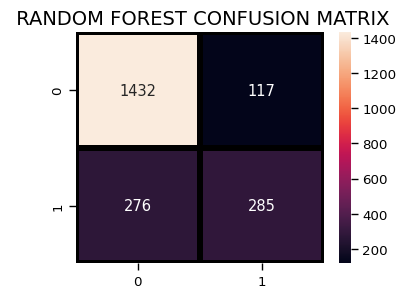

In [145]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

混淆矩阵的横轴是预测值,纵轴是实际值,比如churn=0实际样本数是1432+117=1549

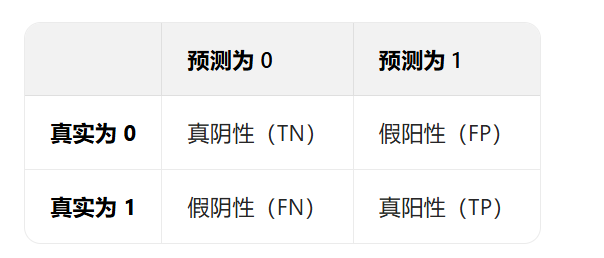

在信用评估中，TPR 可以理解为正确识别出高风险客户的比例(TP/(TP+FN))，FPR 则是将低风险客户误判为高风险客户的比例(FP/(FP+TN))

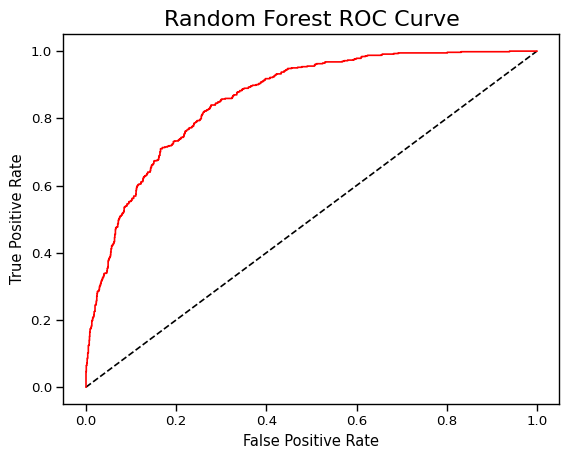

In [146]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
# y_rfpred_prob 是模型预测样本属于正类(预测为1)的概率。
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
# thresholds是阈值,ROC曲线就是随着阈值变化,观察TPR,FPR的变化.
# 阈值即设置一个数,当y大于这个数,y就被判为某个类别
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

In [147]:
roc_auc_rf = auc(fpr_rf, tpr_rf)
print("ROC:",roc_auc_rf)

ROC: 0.8595989132198453


AUC-即ROC曲线下面积大小,越接近1则性能越强。 AUC为0.5时,模型性能等同于随机分类器。

4. **Logistic Regression**

核心思想是基于线性回归的结果，通过一个逻辑函数（也称为 sigmoid 函数）将线性输出映射到 0 到 1 的概率区间，从而实现对样本属于某个类别的概率预测。

In [148]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_pred= lr_model.predict(X_test)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8090047393364929


In [149]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.66      0.58      0.62       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.80      0.81      0.80      2110



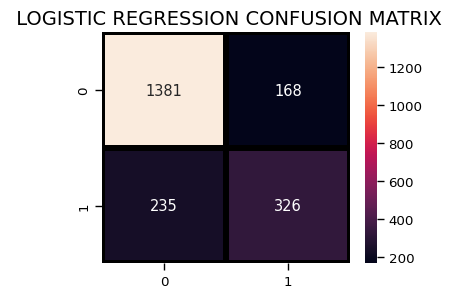

In [150]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

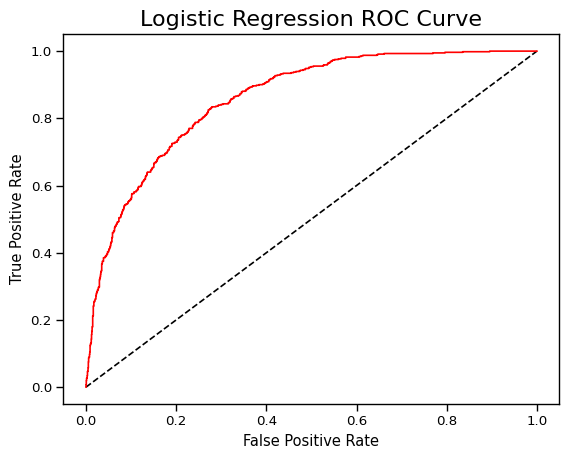

In [151]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

In [152]:
roc_auc_lr = auc(fpr, tpr)
print("ROC:",roc_auc_lr)

ROC: 0.8584953319317046


5. **决策树 Decision Tree Classifier**

决策树分类思想：决策树就像一个不断做选择的流程图。

它先从数据的所有特征里挑出最能区分不同类别的特征当根节点，
按这个特征的不同取值把数据分成多个子集。

对每个子集重复挑特征和划分的操作，直到满足停止条件（像样本都属同一类、树达到最大深度等）。

最后叶子节点的类别由该节点样本的多数类别决定。

预测新样本时，从根节点按样本特征取值沿分支走，到叶子节点就得到预测类别。

In [153]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.728436018957346


决策树Decision Tree accuracy is : 0.7265402843601896, 准确率相比前面的模型都很低,猜测可能是初始的决策树模型的默认参数不太适合,需要调整树的深度,划分标准,最小样本划分数量

In [154]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1549
           1       0.49      0.51      0.50       561

    accuracy                           0.73      2110
   macro avg       0.65      0.66      0.66      2110
weighted avg       0.73      0.73      0.73      2110



6. **AdaBoost Classifier**

**样本权重调整** ：一开始给训练集中每个样本赋予相同的权重。每轮训练一个弱分类器后，会根据这个弱分类器的表现调整样本权重。如果某个样本被弱分类器分错了，就增加它的权重；分对了，就降低权重。这样后续的弱分类器会更关注之前分错的样本。

**弱分类器权重计算** ：计算每个弱分类器的权重，分类误差小的弱分类器权重高，意味着它在最终的强分类器中贡献更大。

**组合弱分类器** ：把多个训练好的弱分类器按照各自的权重组合起来，形成一个强分类器进行最终的预测。

In [155]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
accuracy_me=metrics.accuracy_score(y_test, a_preds)
print("AdaBoost Classifier accuracy is :",accuracy_me)

AdaBoost Classifier accuracy is : 0.8127962085308057


In [156]:
print(classification_report(y_test, a_preds))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1549
           1       0.68      0.56      0.62       561

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.75      2110
weighted avg       0.81      0.81      0.81      2110



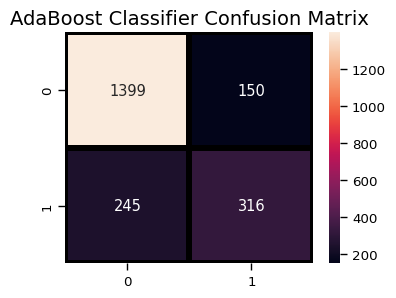

In [157]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

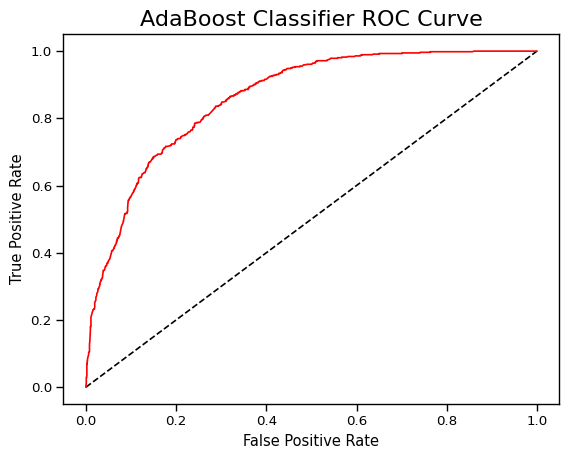

In [158]:
y_adapred_prob = a_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_adapred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='AdaBoost Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost Classifier ROC Curve',fontsize=16)
plt.show();

In [159]:
roc_auc_ada = auc(fpr, tpr)
print("ROC:",roc_auc_ada)

ROC: 0.8608802873223942


7. **Gradient Boosting Classifier**

**初始化模型**：先初始化一个简单的模型，通常预测一个常数值，比如所有样本的均值（对于回归问题）。分类问题,比如如果训练集中垃圾邮件占比 30%，那么初始化模型就会预测每封邮件有 30% 的概率是垃圾邮件。

**计算残差**：用真实值减去当前模型的预测值，得到残差。目标就是让后续的模型去拟合这些残差，使得整体的预测越来越接近真实值。

**训练弱分类器拟合残差**：每一轮训练一个弱分类器来拟合当前的残差。比如用决策树去学习如何预测残差。

**更新模型**：把新训练的弱分类器按照一定的学习率（防止过拟合）加到原来的模型上，不断迭代这个过程，让模型逐步优化。

In [160]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.8080568720379147


In [161]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.55      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



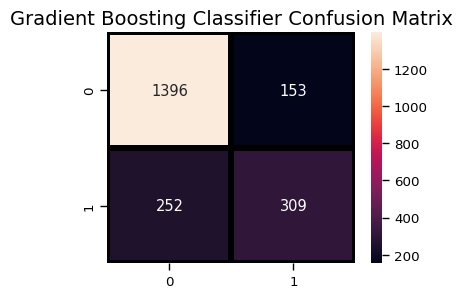

In [162]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

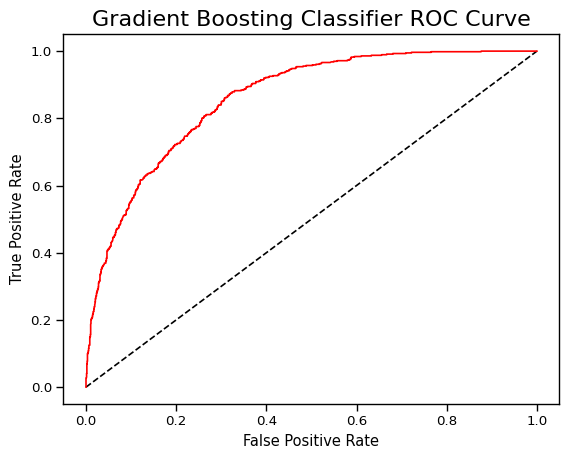

In [163]:
y_grapred_prob = gb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_grapred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Gradient Boosting Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier ROC Curve',fontsize=16)
plt.show();

In [164]:
roc_auc_gb = auc(fpr, tpr)
print("ROC:",roc_auc_gb)

ROC: 0.8587300874924769


8. **投票分类器VotingClassifier**

将前面几个模型组合成一个集成模型

In [165]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
# voting 参数：设置为 'soft'，表示采用软投票方式。在软投票中，每个分类器会输出样本属于各个类别的概率，VotingClassifier 会综合这些概率，对所有分类器预测的各类别概率求平均，然后选择概率最高的类别作为最终预测结果。
# 与之相对的是 'hard' 硬投票，硬投票直接基于每个分类器的最终类别预测结果进行投票，选择获得最多票数的类别作为最终预测类别。
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

Final Accuracy Score 
0.8161137440758294


In [166]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1549
           1       0.68      0.57      0.62       561

    accuracy                           0.82      2110
   macro avg       0.77      0.74      0.75      2110
weighted avg       0.81      0.82      0.81      2110



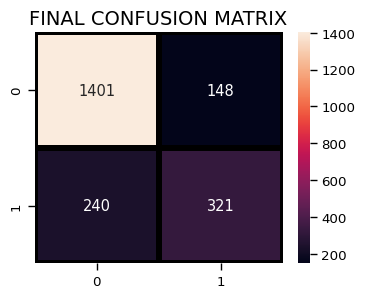

In [167]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

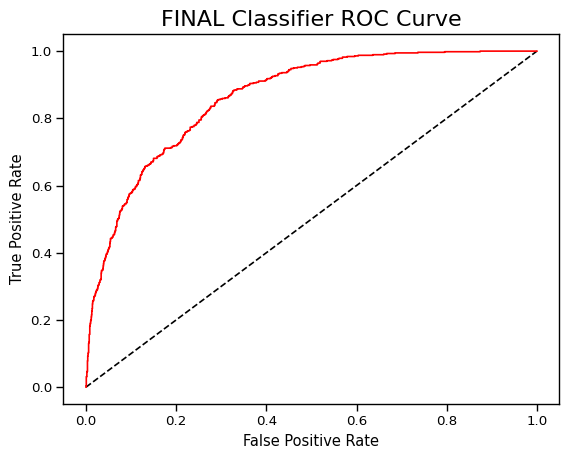

In [168]:
y_finalpred_prob = eclf1.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_finalpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='FINAL Classifier',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('FINAL Classifier ROC Curve',fontsize=16)
plt.show();

In [169]:
roc_auc_final = auc(fpr, tpr)
print("ROC:",roc_auc_final)

ROC: 0.863791141199716


客户流失肯定会损害公司的盈利能力。可以实施各种策略来消除客户流失。避免客户流失的最佳方法是公司真正了解客户。这包括识别有流失风险的客户，并努力提高他们的满意度。当然，改善客户服务是解决这一问题的首要任务。通过相关体验和专业服务建立客户忠诚度是减少客户流失的另一项战略。一些公司会对已经流失的客户进行调查，了解他们离开的原因，以便采取积极的方法避免未来的客户流失。